# Intro to regression with neural network


In [1]:
import tensorflow as tf
print(tf.__version__)
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

2.12.0


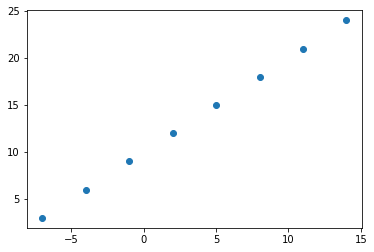

In [2]:
# Creating the data top view and fit
sess = tf.compat.v1.Session(config=config)
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Inputs and Output Shapes

In [4]:
#Demo
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[0].ndim

0

In [8]:
#Turn our Numpy arrays into Tensors

x = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

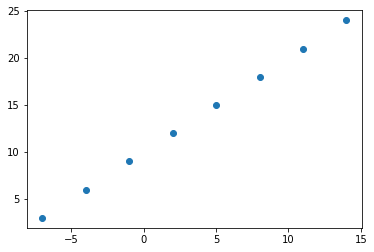

In [10]:
plt.scatter(x, y)

In [11]:
# Set seed
tf.random.set_seed(42)

#Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1)
])

#mae - Mean Absolute Error
model.compile(loss = tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)


Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 8.3195 - mae: 8.3195
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 8.1870 - mae: 8.1870
Epoch 3/50
1/1 [==============================] - 0s 26ms/step - loss: 8.0545 - mae: 8.0545
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 7.9220 - mae: 7.9220
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 7.7895 - mae: 7.7895
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 7.6570 - mae: 7.6570
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 7.5245 - mae: 7.5245
Epoch 8/50
1/1 [==============================] - 0s 18ms/step - loss: 7.4475 - mae: 7.4475
Epoch 9/50
1/1 [==============================] - 0s 24ms/step - loss: 7.4419 - mae: 7.4419
Epoch 10/50
1/1 [==============================] - 0s 24ms/step - loss: 7.4362 - mae: 7.4362
Epoch 11/50
1/1 [==============================] - 0s 25ms/step - loss: 7.4306 - 

In [12]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 208ms/step


array([[29.720043]], dtype=float32)

In [14]:
y_pred = model.predict([14.0])
y_pred

1/1 [==============================] - 0s 92ms/step


array([[24.544596]], dtype=float32)

# Improving our Model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 848ms/step - loss: 18.0572 - mae: 18.0572
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 17.7760 - mae: 17.7760
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 17.4947 - mae: 17.4947
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 17.2135 - mae: 17.2135
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 16.9322 - mae: 16.9322
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 16.6510 - mae: 16.6510
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 16.3697 - mae: 16.3697
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 16.0885 - mae: 16.0885
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 15.8072 - mae: 15.8072
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 15.5260 - mae: 15.5260
Epoch 11/100
1/1 [==============================

1/1 [==============================] - 0s 14ms/step - loss: 6.9056 - mae: 6.9056
Epoch 88/100
1/1 [==============================] - 0s 14ms/step - loss: 6.9000 - mae: 6.9000
Epoch 89/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8944 - mae: 6.8944
Epoch 90/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8888 - mae: 6.8888
Epoch 91/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8831 - mae: 6.8831
Epoch 92/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8775 - mae: 6.8775
Epoch 93/100
1/1 [==============================] - 0s 15ms/step - loss: 6.8719 - mae: 6.8719
Epoch 94/100
1/1 [==============================] - 0s 19ms/step - loss: 6.8663 - mae: 6.8663
Epoch 95/100
1/1 [==============================] - 0s 15ms/step - loss: 6.8606 - mae: 6.8606
Epoch 96/100
1/1 [==============================] - 0s 15ms/step - loss: 6.8550 - mae: 6.8550
Epoch 97/100
1/1 [==============================] - 0s 14ms/step - loss: 

In [16]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [17]:
y


<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 143ms/step


array([[29.527203]], dtype=float32)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    #tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 13.0352 - mae: 13.0352
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 12.1060 - mae: 12.1060
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 11.1721 - mae: 11.1721
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 10.2272 - mae: 10.2272
Epoch 5/50
1/1 [==============================] - 0s 21ms/step - loss: 9.2649 - mae: 9.2649
Epoch 6/50
1/1 [==============================] - 0s 18ms/step - loss: 8.2790 - mae: 8.2790
Epoch 7/50
1/1 [==============================] - 0s 17ms/step - loss: 7.2625 - mae: 7.2625
Epoch 8/50
1/1 [==============================] - 0s 17ms/step - loss: 6.7898 - mae: 6.7898
Epoch 9/50
1/1 [==============================] - 0s 17ms/step - loss: 7.3253 - mae: 7.3253
Epoch 10/50
1/1 [==============================] - 0s 17ms/step - loss: 7.8967 - mae: 7.8967
Epoch 11/50
1/1 [==============================] - 0s 17ms/step - loss: 8

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 156ms/step


array([[25.289204]], dtype=float32)

# Evaluating a model



In [21]:
#Bigger Data

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# make labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [23]:
#visualize
import matplotlib.pyplot as plt


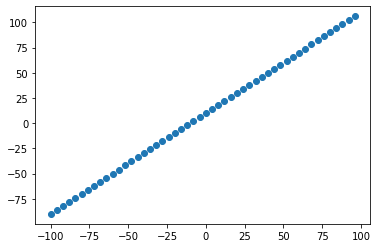

In [24]:
plt.scatter(X, y)

# 3 Sets

In [25]:
len(X)

50

In [26]:
# split the data into train and test data
X_train = X[:40] 
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_test)


(40, 10)

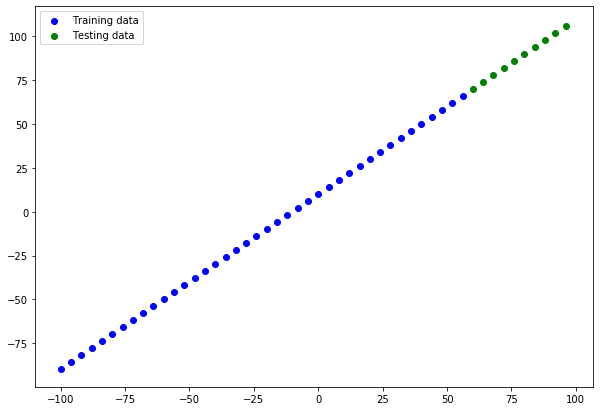

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 15ms/step - loss: 30.6160 - mae: 30.6160
Epoch 2/50
2/2 [==============================] - 0s 14ms/step - loss: 9.8155 - mae: 9.8155
Epoch 3/50
2/2 [==============================] - 0s 19ms/step - loss: 10.7223 - mae: 10.7223
Epoch 4/50
2/2 [==============================] - 0s 14ms/step - loss: 9.5217 - mae: 9.5217
Epoch 5/50
2/2 [==============================] - 0s 14ms/step - loss: 10.4256 - mae: 10.4256
Epoch 6/50
2/2 [==============================] - 0s 14ms/step - loss: 9.6561 - mae: 9.6561
Epoch 7/50
2/2 [==============================] - 0s 15ms/step - loss: 8.7582 - mae: 8.7582
Epoch 8/50
2/2 [==============================] - 0s 14ms/step - loss: 9.0532 - mae: 9.0532
Epoch 9/50
2/2 [==============================] - 0s 13ms/step - loss: 19.2352 - mae: 19.2352
Epoch 10/50
2/2 [==============================] - 0s 13ms/step - loss: 10.3781 - mae: 10.3781
Epoch 11/50
2/2 [==============================] - 0s 14ms/step - los

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name="TensorFlow_regression")

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [31]:
model.summary()

Model: "TensorFlow_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 1s 24ms/step - loss: 45.3587 - mae: 45.3587
Epoch 2/50
2/2 [==============================] - 0s 15ms/step - loss: 30.4332 - mae: 30.4332
Epoch 3/50
2/2 [==============================] - 0s 18ms/step - loss: 35.5999 - mae: 35.5999
Epoch 4/50
2/2 [==============================] - 0s 23ms/step - loss: 26.9595 - mae: 26.9595
Epoch 5/50
2/2 [==============================] - 0s 19ms/step - loss: 14.7466 - mae: 14.7466
Epoch 6/50
2/2 [==============================] - 0s 17ms/step - loss: 11.7541 - mae: 11.7541
Epoch 7/50
2/2 [==============================] - 0s 15ms/step - loss: 12.8352 - mae: 12.8352
Epoch 8/50
2/2 [==============================] - 0s 17ms/step - loss: 11.1029 - mae: 11.1029
Epoch 9/50
2/2 [==============================] - 0s 17ms/step - loss: 40.3846 - mae: 40.3846
Epoch 10/50
2/2 [==============================] - 0s 20ms/step - loss: 27.7874 - mae: 27.7874
Epoch 11/50
2/2 [==============================] - 0s 18ms/

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualizing Model's prediction

In [34]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 114ms/step


array([[ 66.736115],
       [ 71.128365],
       [ 75.520615],
       [ 79.91287 ],
       [ 84.305115],
       [ 88.69737 ],
       [ 93.08963 ],
       [ 97.48187 ],
       [101.87413 ],
       [106.26637 ]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                     test_labels=y_test,
                    predictions = y_pred,
                    ):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

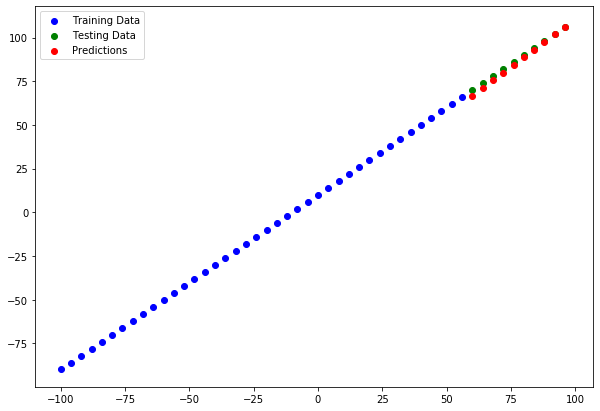

In [37]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred,)

### Evaluating model's predictions with regression evaluation metrics

2 Main metrics:
    1) MAE - Mean Absolute Error, "On avg how wrong is each of my model's predictions"
    2) MSE - Mean Squared Error, "Square the average errors"

In [38]:
#Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 293ms/step - loss: 1.5520 - mae: 1.5520


[1.5520286560058594, 1.5520286560058594]

In [39]:
# Calc MAE

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.5520287>

In [40]:
# calc MSE

mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=3.5156193>

In [41]:
#RESHAPE REQ
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 66.736115,  71.128365,  75.520615,  79.91287 ,  84.305115,
        88.69737 ,  93.08963 ,  97.48187 , 101.87413 , 106.26637 ],
      dtype=float32)>

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
# Functions to reuse MAE and MSE

def mae(y_true, y_pred):
    mae = tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
    return mae

def mse(y_true, y_pred):
    mse = tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
    return mse

### Modelling expriments

1) 'model_1' - same 1 layer, trained with 100 epoch
2) 'model_2' - 2 layers, 100 epochs
3) 'model_3' - 3 layers, 40 epochs, Adam Optimizer (lr=0.1)

In [44]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [46]:
tf.random.set_seed(42)


model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])


model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 32ms/step - loss: 18.1170 - mae: 18.1170
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 13.2289 - mae: 13.2289
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 11.9015 - mae: 11.9015
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 9.2166 - mae: 9.2166
Epoch 5/100
2/2 [==============================] - 0s 26ms/step - loss: 10.0724 - mae: 10.0724
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 9.3467 - mae: 9.3467
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 8.5007 - mae: 8.5007
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 9.0397 - mae: 9.0397
Epoch 9/100
2/2 [==============================] - 0s 24ms/step - loss: 18.5745 - mae: 18.5745
Epoch 10/100
2/2 [==============================] - 0s 24ms/step - loss: 10.0167 - mae: 10.0167
Epoch 11/100
2/2 [==============================] - 0s 26

2/2 [==============================] - 0s 13ms/step - loss: 11.8628 - mae: 11.8628
Epoch 88/100
2/2 [==============================] - 0s 13ms/step - loss: 10.4716 - mae: 10.4716
Epoch 89/100
2/2 [==============================] - 0s 13ms/step - loss: 6.9661 - mae: 6.9661
Epoch 90/100
2/2 [==============================] - 0s 12ms/step - loss: 13.7991 - mae: 13.7991
Epoch 91/100
2/2 [==============================] - 0s 13ms/step - loss: 7.8716 - mae: 7.8716
Epoch 92/100
2/2 [==============================] - 0s 12ms/step - loss: 7.4504 - mae: 7.4504
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 9.1578 - mae: 9.1578
Epoch 94/100
2/2 [==============================] - 0s 13ms/step - loss: 8.5596 - mae: 8.5596
Epoch 95/100
2/2 [==============================] - 0s 12ms/step - loss: 11.5103 - mae: 11.5103
Epoch 96/100
2/2 [==============================] - 0s 12ms/step - loss: 10.2727 - mae: 10.2727
Epoch 97/100
2/2 [==============================] - 0s 12ms/ste

1/1 [==============================] - 0s 105ms/step


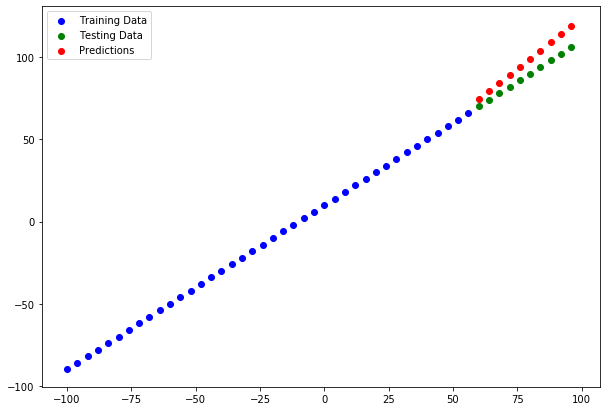

In [47]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [48]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.698407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=82.224655>)

In [49]:
# Model 2

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 29ms/step - loss: 26.5046 - mse: 1286.7217
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 15.8767 - mse: 561.8342
Epoch 3/100
2/2 [==============================] - 0s 28ms/step - loss: 32.2979 - mse: 1580.6960
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 17.0697 - mse: 419.4166
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 22.9157 - mse: 771.8927
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 11.4448 - mse: 147.7687
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 12.5430 - mse: 207.2402
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 11.0863 - mse: 147.4191
Epoch 9/100
2/2 [==============================] - 0s 42ms/step - loss: 39.8581 - mse: 2487.3081
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 27.3323 - mse: 1051.1277
Epoch 11/100
2/2 [=================

2/2 [==============================] - 0s 13ms/step - loss: 20.3563 - mse: 579.6735
Epoch 86/100
2/2 [==============================] - 0s 13ms/step - loss: 10.1580 - mse: 116.1225
Epoch 87/100
2/2 [==============================] - 0s 13ms/step - loss: 24.4188 - mse: 834.5992
Epoch 88/100
2/2 [==============================] - 0s 13ms/step - loss: 19.0820 - mse: 516.9000
Epoch 89/100
2/2 [==============================] - 0s 13ms/step - loss: 7.1441 - mse: 69.6202
Epoch 90/100
2/2 [==============================] - 0s 17ms/step - loss: 18.2186 - mse: 492.2447
Epoch 91/100
2/2 [==============================] - 0s 17ms/step - loss: 13.2661 - mse: 254.6290
Epoch 92/100
2/2 [==============================] - 0s 13ms/step - loss: 14.8018 - mse: 309.0309
Epoch 93/100
2/2 [==============================] - 0s 14ms/step - loss: 11.6030 - mse: 251.0164
Epoch 94/100
2/2 [==============================] - 0s 13ms/step - loss: 16.1585 - mse: 368.7357
Epoch 95/100
2/2 [===========================

1/1 [==============================] - 0s 118ms/step


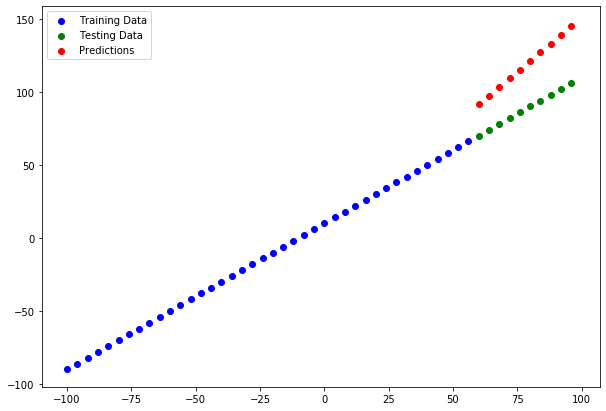

In [50]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [51]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=30.108881>,
 <tf.Tensor: shape=(), dtype=float32, numpy=938.25995>)

In [52]:
# Model 3

tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["mse"]
               )

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=40)


Epoch 1/40
2/2 [==============================] - 3s 29ms/step - loss: 58.4621 - mse: 4831.7236
Epoch 2/40
2/2 [==============================] - 0s 25ms/step - loss: 15.2877 - mse: 355.5488
Epoch 3/40
2/2 [==============================] - 0s 25ms/step - loss: 21.4598 - mse: 633.6663
Epoch 4/40
2/2 [==============================] - 0s 20ms/step - loss: 12.0380 - mse: 187.3446
Epoch 5/40
2/2 [==============================] - 0s 22ms/step - loss: 10.0308 - mse: 123.7905
Epoch 6/40
2/2 [==============================] - 0s 22ms/step - loss: 19.9524 - mse: 545.2969
Epoch 7/40
2/2 [==============================] - 0s 20ms/step - loss: 7.7676 - mse: 102.2232
Epoch 8/40
2/2 [==============================] - 0s 23ms/step - loss: 17.7312 - mse: 453.0322
Epoch 9/40
2/2 [==============================] - 0s 23ms/step - loss: 7.4539 - mse: 92.6951
Epoch 10/40
2/2 [==============================] - 0s 17ms/step - loss: 13.4452 - mse: 242.2376
Epoch 11/40
2/2 [==============================] - 

1/1 [==============================] - 0s 131ms/step


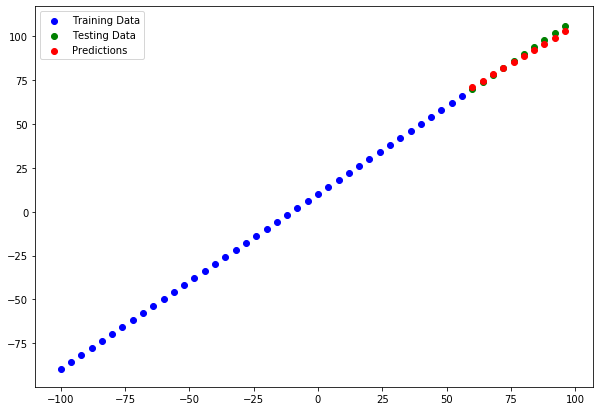

In [53]:
y_pred_3 = model_3.predict(y_test)
plot_predictions(predictions=y_pred_3)

In [54]:
y_pred_3, y_test

(array([[ 71.358315],
        [ 74.86015 ],
        [ 78.362   ],
        [ 81.86383 ],
        [ 85.36566 ],
        [ 88.86752 ],
        [ 92.36935 ],
        [ 95.8712  ],
        [ 99.373024],
        [102.87489 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [57]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.3994987>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.8277469>)

### Comparing the results

In [59]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
                 
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.698407,82.224655
1,model_2,30.108881,938.259949
2,model_3,1.399499,2.827747


In [60]:
 model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [61]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                40        
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Tracking your Experiments

#TensorBoard - track modelling expriments.
#Weights and Biases 

### Save the models

In [63]:
# Save the model using SavedModel format

model_2.save("model2_SavedModel_Format")

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0xfffeae365cd0>, 281469296160160), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0xfffeada14190>, 281469296158640), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0xfffeae7aef40>, 281469296159680), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0xfffead8bbb80>, 281469296159040), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 10), dtype=tf.flo

INFO:tensorflow:Assets written to: model2_SavedModel_Format/assets


INFO:tensorflow:Assets written to: model2_SavedModel_Format/assets


In [64]:
# SAve the model using HDF5 format

model_3.save("Model3_HDF5_Format.h5")

### Loading the saved models

In [68]:
loaded_SavedModel_Format = tf.keras.models.load_model("model2_SavedModel_Format")
loaded_SavedModel_Format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_Format_preds = loaded_SavedModel_Format.predict(X_test)
model_2_preds == loaded_SavedModel_Format_preds

1/1 [==============================] - 0s 54ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [75]:
model_2_preds, loaded_SavedModel_Format_preds

(array([[ 91.28581 ],
        [ 97.24649 ],
        [103.20718 ],
        [109.167854],
        [115.12855 ],
        [121.08923 ],
        [127.04991 ],
        [133.01057 ],
        [138.97127 ],
        [144.93195 ]], dtype=float32),
 array([[ 91.28581 ],
        [ 97.24649 ],
        [103.20718 ],
        [109.167854],
        [115.12855 ],
        [121.08923 ],
        [127.04991 ],
        [133.01057 ],
        [138.97127 ],
        [144.93195 ]], dtype=float32))

In [76]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_Format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [81]:
# Loading the HDF5 Model

loaded_HDF5_Model = tf.keras.models.load_model("Model3_HDF5_Format.h5")
loaded_HDF5_Model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                40        
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_3_preds = model_3.predict(X_test)
loaded_HDF5_Model_preds = loaded_HDF5_Model.predict(X_test)
model_3_preds == loaded_HDF5_Model_preds

1/1 [==============================] - 0s 48ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Working with some larger Data

In [84]:
# Data from RAW Github to CSV

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [85]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [89]:
pd.get_dummies(insurance)

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [87]:
!pip install numpy==1.16.5

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 11.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for numpy: filename=numpy-1.16.5-cp38-cp38-linux_aarch64.whl size=9432671 sha256=5ba1cae64f8c71431677a9d2b409c418524358ccf1bd11ffdcc23d8c32231366
  Stored in directory: /home/stemtec/.cache/pip/wheels/8f/3f/d3/ac786baa3379136ed1069cf94478550de71616e0490b462e90
Successfully built numpy
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx-graphsurgeon 0.3.12 requires onnx, which is not installed.
jax 0.4.13 requires numpy>=1.21, but you have numpy 1.16.5 which is incompatible.
ml-dtypes 0.2.0 requires numpy>1.20, but you have numpy 1.16.5 which is incompatible.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 1.16.5 which is inco